In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make tables easier to read
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

## Load data

In [4]:
CSV_PATH = "./data/data_clean.csv"

In [5]:
df = pd.read_csv(CSV_PATH)

/var/folders/dy/m0399mcx2q1clz71rv1dbwcm0000gn/T/ipykernel_45053/3910602416.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


## Initial data analyses

In [15]:
df.head()

,any,mes,codi de la regió sanitària,regió sanitària,grup d'edat,sexe,codi del grup ATC nivell 1,grup ATC nivell 1,codi del grup ATC nivell 2,grup ATC nivell 2,codi del grup ATC nivell 3,grup ATC nivell 3,codi del grup ATC nivell 4,grup ATC nivell 4,nombre de receptes,nombre d'envasos,import íntegre,import aportació CatSalut,age_key
0,2016,1,61,LLEIDA,0-1,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A01,PREPARADOS ESTOMATOLOGICOS,A01A,PREPARADOS ESTOMATOLOGICOS,A01AB,Antiinfecciosos y antisepticos para el tratami...,15,15,42.45,26.04,0
1,2016,1,61,LLEIDA,0-1,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A02,AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CA...,A02B,AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...,A02BC,Inhibidores de la bomba de protones,1,1,2.19,1.31,0
2,2016,1,61,LLEIDA,0-1,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A03,AGENTES CONTRA PADECIMIENTOS FUNCIONALES DEL E...,A03F,PROPULSIVOS,A03FA,Propulsivos,2,2,5.00,3.00,0
3,2016,1,61,LLEIDA,0-1,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07A,ANTIINFECCIOSOS INTESTINALES,A07AA,Antibioticos,6,6,18.72,11.22,0
4,2016,1,61,LLEIDA,0-1,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07C,ELECTROLITOS CON CARBOHIDRATOS,A07CA,Formulaciones de sales de rehidratacion oral,40,40,108.81,67.61,0


In [16]:
df.shape, df.dtypes

((7828021, 19),
 any                              int64
 mes                              int64
 codi de la regió sanitària      object
 regió sanitària                 object
 grup d'edat                   category
 sexe                            object
 codi del grup ATC nivell 1      object
 grup ATC nivell 1               object
 codi del grup ATC nivell 2      object
 grup ATC nivell 2               object
 codi del grup ATC nivell 3      object
 grup ATC nivell 3               object
 codi del grup ATC nivell 4      object
 grup ATC nivell 4               object
 nombre de receptes               int64
 nombre d'envasos                 int64
 import íntegre                 float64
 import aportació CatSalut      float64
 age_key                          int64
 dtype: object)

In [17]:
df.describe()

,any,mes,nombre de receptes,nombre d'envasos,import íntegre,import aportació CatSalut,age_key
count,7.828021e+06,7.828021e+06,7.828021e+06,7.828021e+06,7.828021e+06,7.828021e+06,7.828021e+06
mean,2.020736e+03,6.338038e+00,1.821872e+02,1.822639e+02,2.368167e+03,2.158043e+03,4.792238e+01
std,2.923682e+00,3.400331e+00,1.138471e+03,1.139480e+03,1.628385e+04,1.538416e+04,5.859489e+01
min,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,3.000000e+00,3.000000e+00,3.000000e+00,2.816000e+01,2.172000e+01,2.000000e+01
50%,2.021000e+03,6.000000e+00,1.300000e+01,1.300000e+01,1.357000e+02,1.109000e+02,4.500000e+01
75%,2.023000e+03,9.000000e+00,6.200000e+01,6.200000e+01,7.702100e+02,6.518500e+02,6.500000e+01
max,2.025000e+03,1.200000e+01,1.468080e+05,1.468080e+05,3.189276e+06,3.068263e+06,1.000000e+03


### Order age groups

Age group is a categorical variable, we need to sort it as a numerical value, not lexically (alphabetically)

In [6]:
import re

def age_sort_key(age_str):
    # Handle special categories
    if age_str == "Altres":
        return 999
    if age_str == "Sense especificar":
        return 1000
    if age_str == "85+":   # our replaced "Més de 84 anys"
        return 85

    # Extract starting number (e.g., "20-24" → 20)
    m = re.match(r"(\d+)", age_str)
    if m:
        return int(m.group(1))
    return None


df["age_key"] = df["grup d'edat"].apply(age_sort_key)
age_counts = df.groupby(["grup d'edat", "age_key"])["nombre de receptes"].sum()
age_counts = age_counts.reset_index().sort_values("age_key")
ordered_ages = age_counts["grup d'edat"].tolist()

df["grup d'edat"] = pd.Categorical(
    df["grup d'edat"],
    categories=ordered_ages,
    ordered=True
)

In [7]:
ages = df["grup d'edat"].unique()
ages

['0-1', '10-11', '12-13', '14-15', '16-17', ..., '8-9', '80-84', '85+', 'Altres', 'Sense especificar']
Length: 26
Categories (26, object): ['0-1' < '2-3' < '4-5' < '6-7' ... '80-84' < '85+' < 'Altres' < 'Sense especificar']

### Basic analyses (high level)

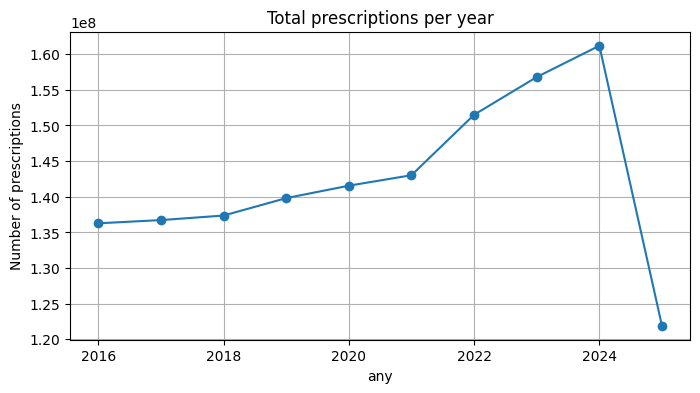

In [19]:
plt.figure(figsize=(8,4))
df.groupby("any")["nombre de receptes"].sum().plot(marker="o")
plt.title("Total prescriptions per year")
plt.ylabel("Number of prescriptions")
plt.grid(True)
plt.show()

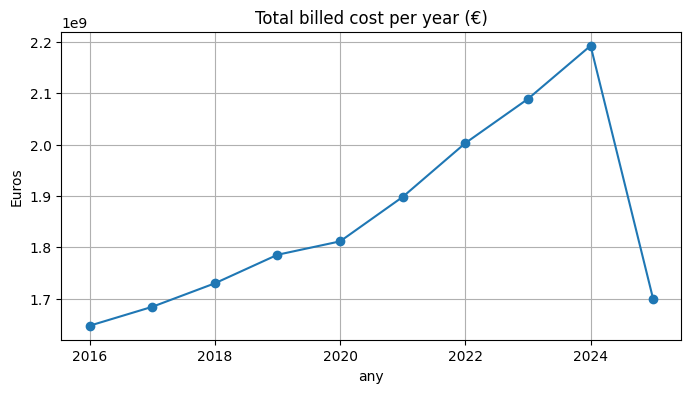

In [20]:
plt.figure(figsize=(8,4))
df.groupby("any")["import íntegre"].sum().plot(marker="o")
plt.title("Total billed cost per year (€)")
plt.ylabel("Euros")
plt.grid(True)
plt.show()

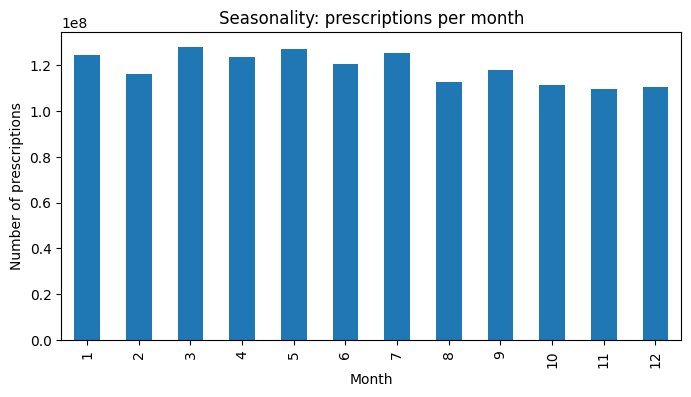

In [21]:
plt.figure(figsize=(8,4))
df.groupby("mes")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Seasonality: prescriptions per month")
plt.ylabel("Number of prescriptions")
plt.xlabel("Month")
plt.show()

/var/folders/dy/m0399mcx2q1clz71rv1dbwcm0000gn/T/ipykernel_45053/4212320414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grup d'edat")["nombre de receptes"].sum().plot(kind="bar")


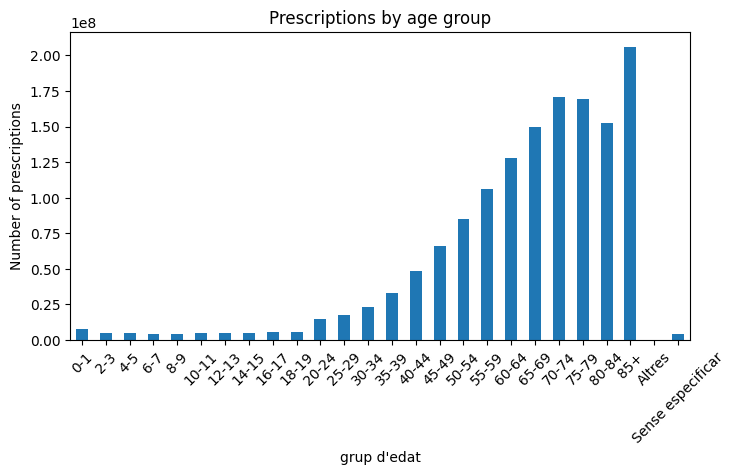

In [22]:
plt.figure(figsize=(8,4))
df.groupby("grup d'edat")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Prescriptions by age group")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=45)
plt.show()

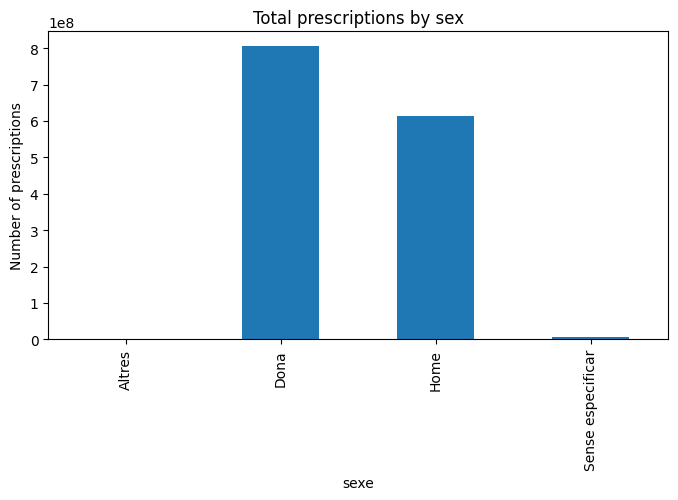

In [23]:
plt.figure(figsize=(8,4))
df.groupby("sexe")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Total prescriptions by sex")
plt.ylabel("Number of prescriptions")
plt.show()

### Aggregations on level 1

#### Aggregate by age

Which drug group (level 1) dominates most for every age group.

/var/folders/dy/m0399mcx2q1clz71rv1dbwcm0000gn/T/ipykernel_45053/3719020216.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["grup d'edat", "grup ATC nivell 1"])["nombre de receptes"]


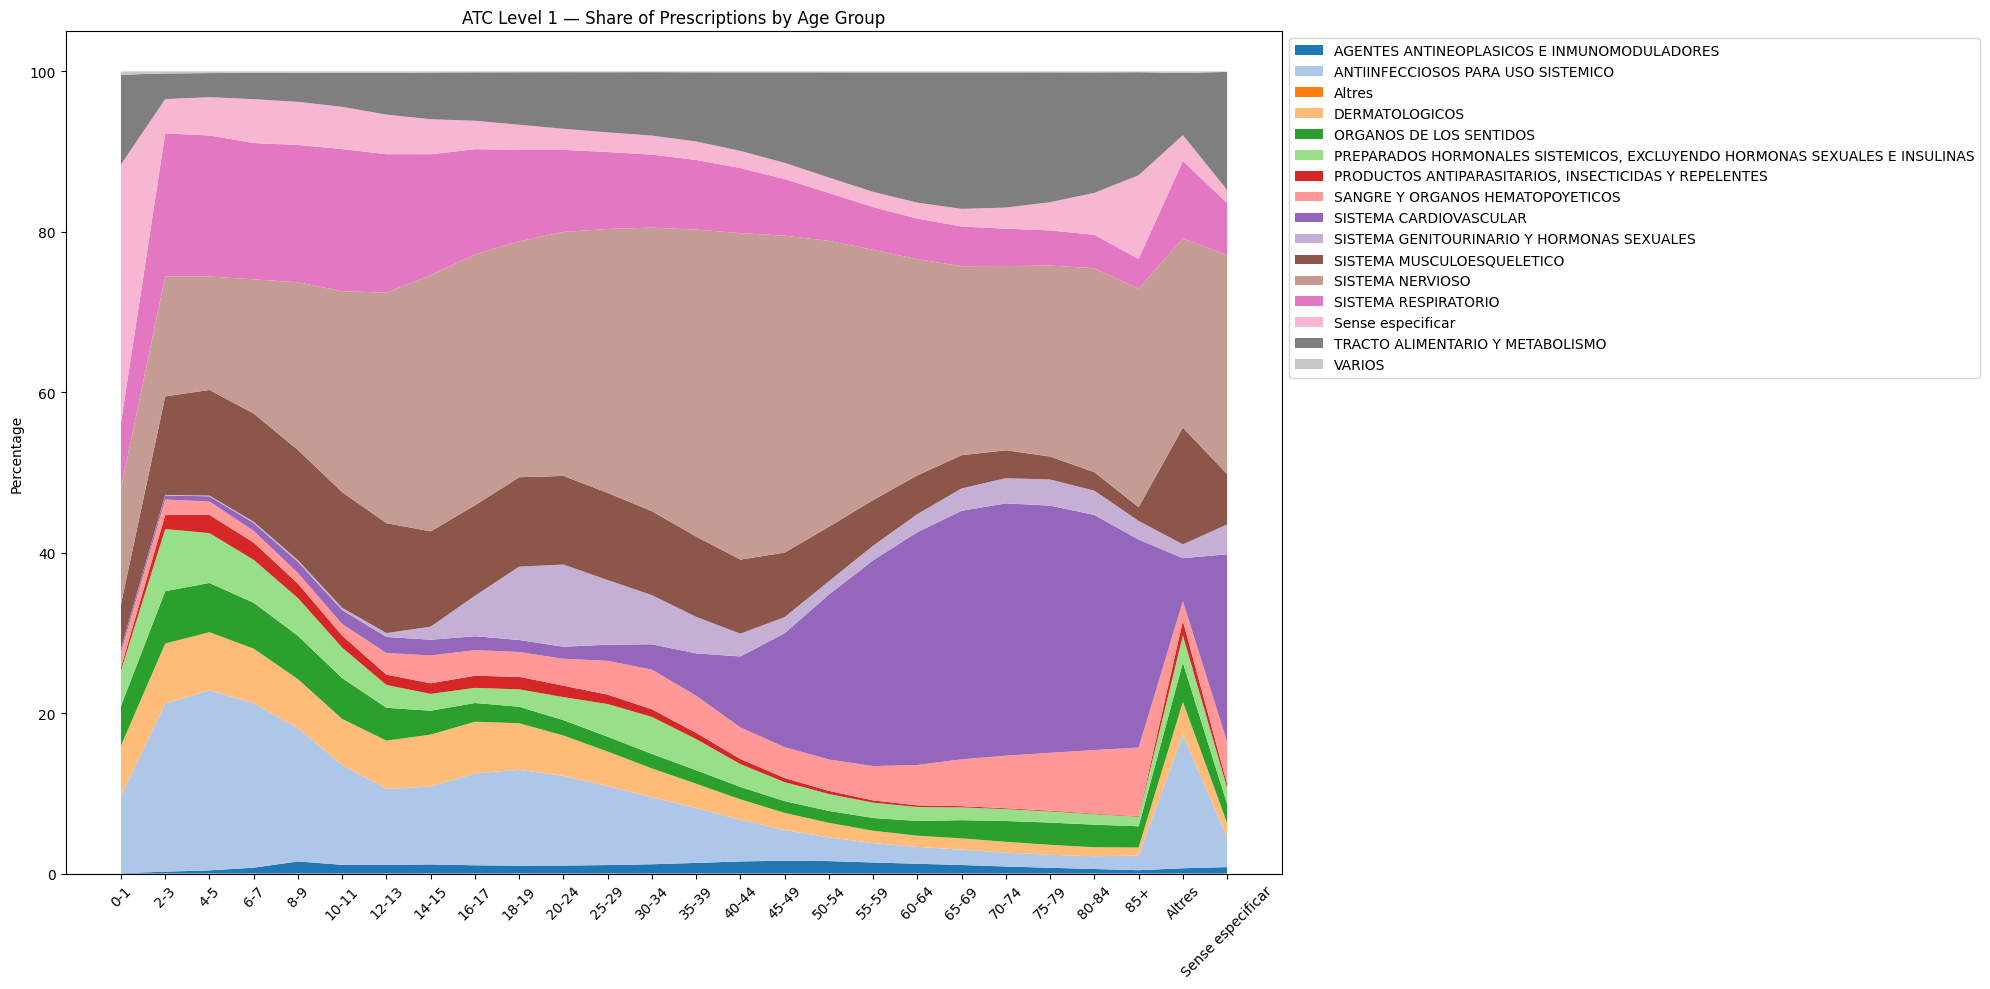

In [ ]:
# Aggregate by age × level 1
lvl1_by_age = (
    df.groupby(["grup d'edat", "grup ATC nivell 1"])["nombre de receptes"]
    .sum()
    .unstack(fill_value=0)
    .loc[df["grup d'edat"].cat.categories]  # ensure ordering
)

# Normalize to percentage per age
lvl1_pct = lvl1_by_age.div(lvl1_by_age.sum(axis=1), axis=0) * 100

colors = sns.color_palette("tab20", n_colors=len(lvl1_pct.columns))

plt.figure(figsize=(20,10))
plt.stackplot(
    lvl1_pct.index,
    lvl1_pct.T,
    colors=colors,
    labels=lvl1_pct.columns,
)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Percentage")
plt.title("ATC Level 1 — Share of Prescriptions by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1. **Childhood and Adolescence (0-14)**: A Period of Acute Conditions, Not Chronic Ones
   
    In the earliest age groups, prescriptions are shaped by short-term, episodic conditions rather than chronic disease:
     - Anti-infectives explode early — classic childhood infections.
     - Respiratory system drugs peak strongly — asthma, bronchitis, winter infections, allergies.

2. **Early Adulthood (20–40)**: A Shift Toward Chronic & Lifestyle-Linked Needs
   
   Around ages 20–39, the landscape stabilizes:
    - Cardiovascular medications begin their long rise, though still modest in this interval.
    - Alimentary/metabolism (digestive & metabolic) and musculoskeletal prescriptions increase gradually.
    - Hormonal and hematopoietic categories appear more consistently.
    - Nervous system drugs start their upward trajectory, reflecting:
        - anxiety and depression diagnoses,
        - stress-related sleep disturbances,
        - early chronic pain patterns.

3. **Midlife to Early Senior Years (45–75)**: The Silent Rise of the Mind

    Between 45 and 75:
    - Cardiovascular medications become a dominant share — hypertension, cholesterol management, heart disease prevention.
    - Nervous system drugs rise steadily and become one of the largest prescription categories, nearly matching cardiovascular drugs in some age groups.
    This is one of the most striking transitions in the entire dataset.
    
    It reflects:
    - rising rates of depression and anxiety,
    - sleep disorders,
    - chronic pain management,
    - and possibly increased diagnosis and treatment of neurological conditions.

    By 65–75, Nervioso becomes a major share of all prescriptions — a visible turning point in the plot.

4. **Late Age (75+)**: The System is Doing Multi-Organ Maintenance

    The 75+ population displays the widest polypharmacy footprint, with nervous-system drugs retaining a major role.
    
    In the oldest adults:
    - Cardiovascular and alimentary/metabolism categories take up the largest shares — longstanding chronic diseases (hypertension, diabetes, dyslipidemia).
    - Nervous system treatments remain high, reflecting management of:
        - dementia,
        - chronic pain,
        - sleep disorders,
        - psychiatric conditions.
    - Musculoskeletal and sensory-organ drugs decline in relative share, but this is likely because cardiovascular and metabolic treatments occupy much larger proportions — not because true need declines.


**The nervous system is almost invisible in childhood — but becomes unavoidable with age.**

The Nervous System category increases steadily from age ~18 and peaks at 45–60, becoming one of the most prescribed drug categories in Catalonia.

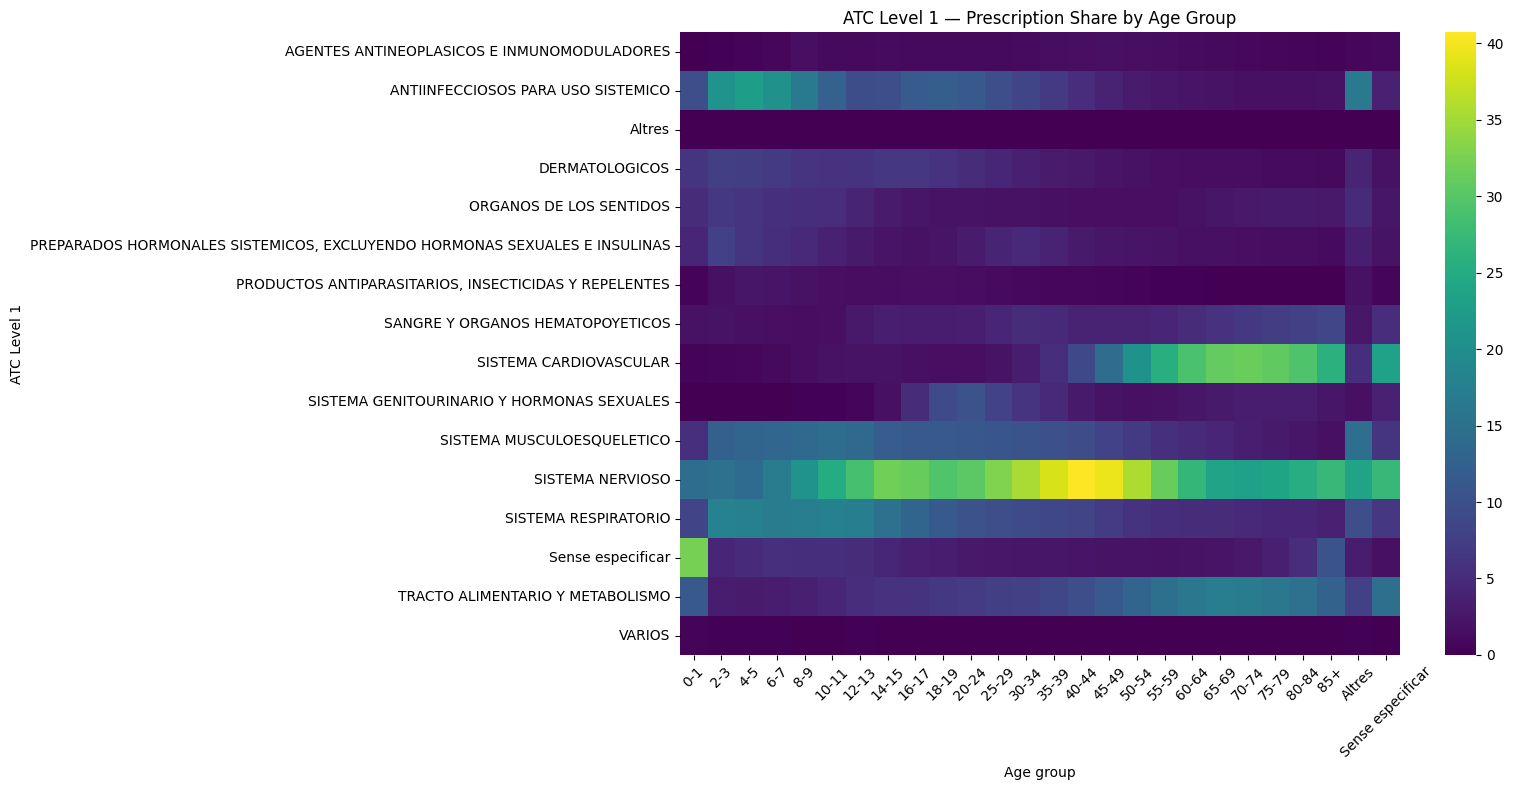

In [24]:
plt.figure(figsize=(16, 8))
sns.heatmap(lvl1_pct.T, cmap="viridis", annot=False)
plt.title("ATC Level 1 — Prescription Share by Age Group")
plt.ylabel("ATC Level 1")
plt.xlabel("Age group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Sistema Nervioso stands out as one of the clearest life-stage markers

    The brightest band in the center of the heatmap corresponds to SISTEMA NERVIOSO, which:

    - Rises rapidly starting from the teens and early adulthood
    - Peaks at 45–64, where it becomes one of the largest categories, exceeding 30–40% share
    - Declines only slightly in older ages but remains consistently high

    This suggests that:
    - mental-health medications, pain management drugs, sedatives, antidepressants, anxiolytics, etc. form one of the largest pharmacological burdens in middle age

2. Childhood is dominated by respiratory and anti-infective treatments

    For ages 0–14, the strongest colors appear in:
    - SISTEMA RESPIRATORIO (respiratory drugs)
    - ANTINFECCIOSOS (anti-infectives)
    
    A very intuitive pattern — representing asthma, allergies, infections, and common pediatric illnesses.

3. Cardiovascular drugs dominate the senior population

    Starting around 55+, especially 65–80, the Cardiovascular category lights up strongly:
    - The share grows steadily with age
    - Peaks at older ages
    - Outcompetes most other categories except the metabolic group

    This reflects the predictable rise of hypertension, cholesterol control, anticoagulants, etc.

4. Metabolism/Alimentary drugs grow parallel to cardiovascular

    TRACTO ALIMENTARIO Y METABOLISMO gets progressively brighter with age, showing:
    - growing prevalence of diabetes,
    - metabolic syndrome,
    - digestive issues,
    - lipid-lowering therapy,
    - and chronic gastrointestinal conditions.

    The metabolic–cardiovascular pair becomes the pharmacological backbone of old age.

5. Respiratory drugs decline drastically after adolescence

6. Musculoskeletal prescriptions form a steady band in midlife

    Musculoskeletal drugs (pain, arthritis, inflammation):
    - appear modestly in adulthood
    - peak slightly around 45–60
    - decline afterward

    This matches expected patterns of joint disease and chronic pain.


#### Aggregate by year

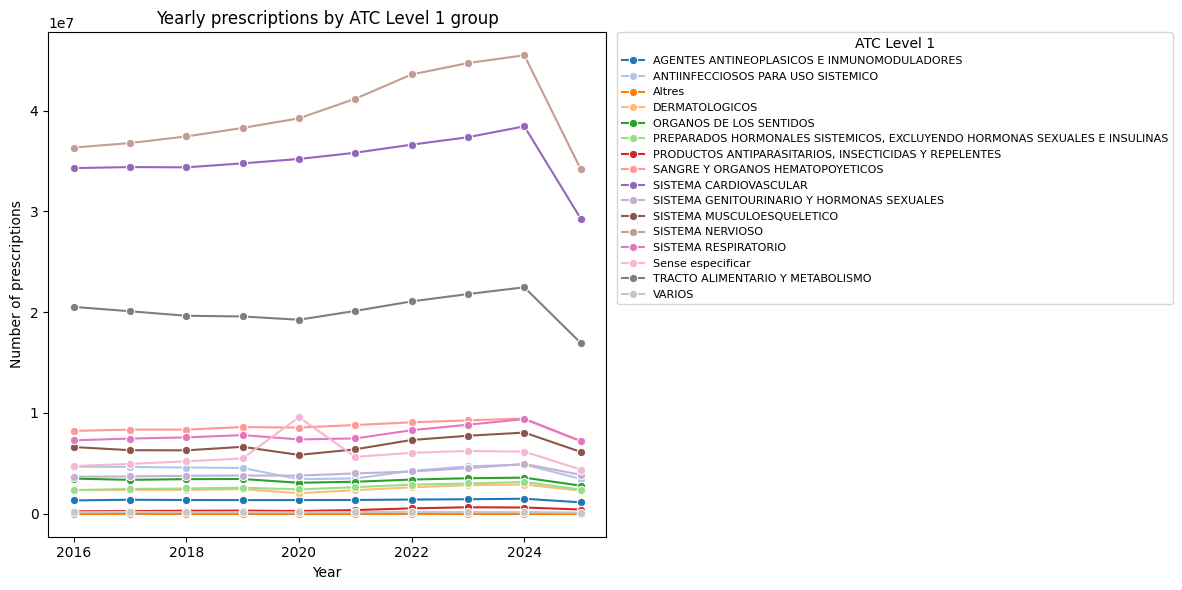

In [13]:
# Aggregate by year × ATC Level 1
year_lvl1_all = (
    df
    .groupby(["any", "grup ATC nivell 1"])["nombre de receptes"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

# Use a large qualitative palette so colors are distinct
n_groups = year_lvl1_all["grup ATC nivell 1"].nunique()
palette = sns.color_palette("tab20", n_groups)  # tab20 is good up to ~20 groups

sns.lineplot(
    data=year_lvl1_all,
    x="any",
    y="nombre de receptes",
    hue="grup ATC nivell 1",
    marker="o",
    palette=palette
)

plt.title("Yearly prescriptions by ATC Level 1 group")
plt.ylabel("Number of prescriptions")
plt.xlabel("Year")

# Put legend outside on the right
plt.legend(
    title="ATC Level 1",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0.,
    fontsize=8
)

plt.tight_layout()
plt.show()


The growth during 2020–2022 is visible in multiple groups:
- This may reflect increased chronic disease management and mental-health prescriptions during and after COVID-19.

Interested to see what happened with **Sense especificar** in 2020??

Nervous-system prescriptions in particular display sustained long-term growth.

#### Aggregate by month

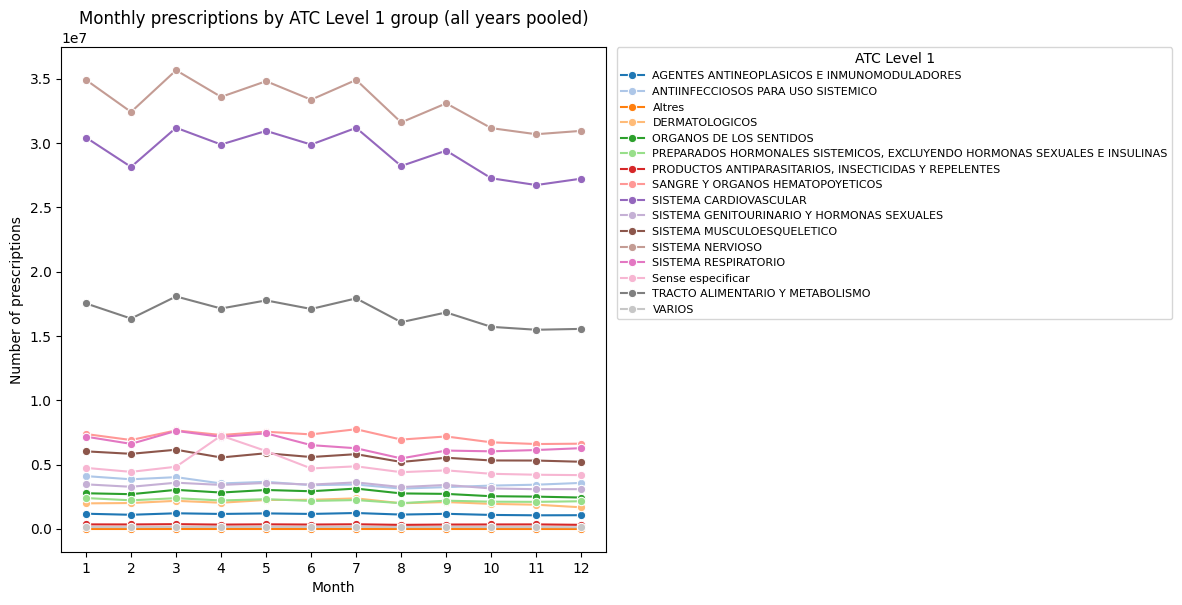

In [14]:
# Aggregate by month × ATC Level 1 (pool all years)
month_lvl1_all = (
    df
    .groupby(["mes", "grup ATC nivell 1"])["nombre de receptes"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

n_groups_m = month_lvl1_all["grup ATC nivell 1"].nunique()
palette_m = sns.color_palette("tab20", n_groups_m)

sns.lineplot(
    data=month_lvl1_all,
    x="mes",
    y="nombre de receptes",
    hue="grup ATC nivell 1",
    marker="o",
    palette=palette_m
)

plt.title("Monthly prescriptions by ATC Level 1 group (all years pooled)")
plt.ylabel("Number of prescriptions")
plt.xlabel("Month")
plt.xticks(range(1, 13))

plt.legend(
    title="ATC Level 1",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0.,
    fontsize=8
)

plt.tight_layout()
plt.show()


Respiratory medications show the expected winter peaks (Jan–Mar) and summer lows, reflecting seasonal infections and allergies.

Nervous system medications show:
- A relatively stable level across the year
- But a small recurring uptick around March–April, which may relate to:
    - Post-winter symptom worsening
    - Increased visits after holiday periods